In [1]:
#import standard things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() # use seaborn plotting style

#import file/os things
from pathlib import Path
import pickle
import codecs

#import data science things
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

#import wordcloud for silly visualization
from wordcloud import WordCloud

#import for Tfidf Vectorizer

#import for preprocessing stuff
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#import for models for selection
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, naive_bayes, svm

#import for making the pipeline
from sklearn.pipeline import make_pipeline

#import for getting stats and stuff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Setup data directory variable for global use
data_dir = Path.home() / "Desktop" / "bah-intermediate" / "CAPSTONE" / "data"
test_data = Path.home() / "Desktop" / "bah-intermediate" / "CAPSTONE" / "test_data"

In [2]:
def make_prediction(text, model, df):
    topics = df.topic.unique()
    prediction = model.predict([text])
    print(prediction-1)
    return topics[prediction-1]

In [3]:
df = pickle.load(open(data_dir / 'bbc_df_trimmed.pickle', 'rb'))

df['target'] = df.topic.map({'business':1, 'sport':2, 'politics':3, 'tech':4, 'entertainment':5})

df.head()

,text,title,topic,tokens,stemmed_list,stemmed,lemmed_list,lemmed,word_count,target
0,Ad sales boost Time Warner profit\n\nQuarterly...,Ad sales boost Time Warner profit,business,"[ad, sales, boost, time, warner, profit, quart...","[sale, boost, time, warner, profit, quarterli,...",sale boost time warner profit quarterli profit...,"[sale, boost, time, warner, profit, quarterly,...",sale boost time warner profit quarterly profit...,221,1
1,Dollar gains on Greenspan speech\n\nThe dollar...,Dollar gains on Greenspan speech,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit highes...,"[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit high l...,212,1
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos unit buyer faces loan claim,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yuko, unit, buyer, face, loan, claim, owner, ...",yuko unit buyer face loan claim owner embattl ...,"[yukos, unit, buyer, face, loan, claim, owner,...",yukos unit buyer face loan claim owner embattl...,149,1
3,High fuel prices hit BA's profits\n\nBritish A...,High fuel prices hit BA's profits,business,"[high, fuel, prices, hit, ba, 's, profits, bri...","[high, fuel, price, hit, profit, british, airw...",high fuel price hit profit british airway blam...,"[high, fuel, price, hit, profit, british, airw...",high fuel price hit profit british airway blam...,216,1
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod takeover talk lifts Domecq,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeov, talk, lift, domecq, share, dr...",pernod takeov talk lift domecq share drink foo...,"[pernod, takeover, talk, lift, domecq, share, ...",pernod takeover talk lift domecq share drink f...,152,1


In [4]:
np.random.seed(42)

# Multinomial Naive Bayse Classifier Pipeline with Tfidf Vectorizer

In [5]:
def mnb_pipeline(text_list, target_array, topic_list):
    # Build the model
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())

    train_data, test_data, train_targets, test_targets = train_test_split(text_list, 
                                                                          target_array,
                                                                          test_size=0.3,
                                                                          random_state=42)

    print("We have {} unique classes".format(len(topic_list)))
    print("We have {} training samples".format(len(train_data)))
    print("We have {} test samples".format(len(test_data)))

    # Train the model using the training data
    model.fit(train_data, train_targets)

    # Predict the categories of the test data
    predicted_categories = model.predict(test_data)

    # plot the confusion matrix
    mat = confusion_matrix(test_targets, predicted_categories)

    sns.heatmap(mat.T, square = True, annot=True, fmt = "d", 
                xticklabels=['business', 'sport', 'politics', 'tech', 'entertainment'],
                yticklabels=['business', 'sport', 'politics', 'tech', 'entertainment'])

    plt.xlabel("true labels")
    plt.ylabel("predicted label")
    plt.show()

    print("The accuracy is {}".format(accuracy_score(test_targets, predicted_categories)))
    return model

# Multinomial_NB Prediction stuff

We have 5 unique classes
We have 1540 training samples
We have 660 test samples


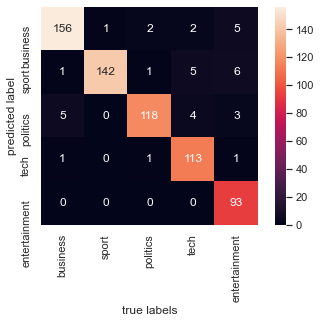

The accuracy is 0.9424242424242424
We have 5 unique classes
We have 1540 training samples
We have 660 test samples


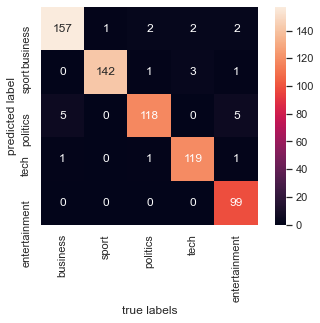

The accuracy is 0.9621212121212122
We have 5 unique classes
We have 1540 training samples
We have 660 test samples


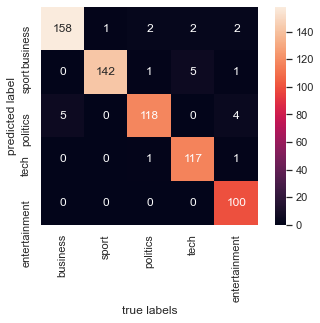

The accuracy is 0.9621212121212122


In [6]:
model_raw = mnb_pipeline(df.text.to_list(), df.target.to_numpy(), df.topic.unique())

model_stemmed = mnb_pipeline(df.stemmed.to_list(), df.target.to_numpy(), df.topic.unique())

model_lemmed = mnb_pipeline(df.lemmed.to_list(), df.target.to_numpy(), df.topic.unique())

In [ ]:
with codecs.open(test_data / 'test_article1.txt', 'r', encoding='utf-8', errors='ignore') as f:
    text = f.read()

print("Raw model prediction: ", 
      make_prediction(text_clean, model_raw, df),
      "\nActual topic: Politics")

print("Stemmed model prediction: ", 
      make_prediction(text, model_stemmed, df),
      "\nActual topic: Politics")

print("Lemmatized model prediction: ", 
      make_prediction(text, model_lemmed, df),
      "\nActual topic: Politics")

In [ ]:
with codecs.open(test_data / 'test_article2.txt', 'r', encoding='utf-8', errors='ignore') as f:
    text = f.read()

print("Raw model prediction: ", 
      make_prediction(text_clean, model_raw, df),
      "\nActual topic: Politics")

print("Stemmed model prediction: ", 
      make_prediction(text, model_stemmed, df),
      "\nActual topic: Politics")

print("Lemmatized model prediction: ", 
      make_prediction(text, model_lemmed, df),
      "\nActual topic: Politics")

In [14]:
my_text = 'drugs'
print(make_prediction(my_text, model_raw, df))

[1]
['entertainment']


In [10]:
my_text2 = 'sex drugs rock and roll'
print(make_prediction(my_text2, model_stemmed, df))

[4]
['tech']


# BREAK BREAK

In [ ]:
cv = CountVectorizer()

In [ ]:
word_count_vectors = cv.fit_transform(list(df.text_clean))
word_count_array = word_count_vectors.toarray()

In [ ]:
print(word_count_vectors.shape, '\n', word_count_array)

In [ ]:
print(cv.get_feature_names()[0:5])

In [ ]:
dtm_df = pd.DataFrame(word_count_array, columns=cv.get_feature_names())
dtm_df.head()

In [ ]:
corpus_freq_dist = dtm_df.sum().to_dict()
sorted_list = sorted(corpus_freq_dist.items(), reverse=True, key=lambda kv: kv[1])
dict(sorted_list[:10])

In [ ]:
vectors_train, vectors_test, topics_train, topics_test = train_test_split(word_count_array, list(df.topic))

In [ ]:
nbclassifier = GaussianNB()
nbclassifier.fit(vectors_train, topics_train)

In [ ]:
# Predict with the testing set
topics_pred = nbclassifier.predict(vectors_test)

# ...and measure the accuracy of the results
print(classification_report(topics_test, topics_pred))

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(topics_test, topics_pred))